# Long v/s short Trading

In [ ]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np
import yfinance as yf
import datetime as dt
from datetime import date
from datetime import timedelta

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
strtDate=dt.datetime(2022,6,1)
endDate=dt.datetime(2023,5,31)

Pair of stationary stocks between 1 Jun 2022 and 31 May 2023:

In [ ]:
tickers=yf.Ticker('AXISBANK.NS IDBI.NS')

In [ ]:
data=yf.download("AXISBANK.NS IDBI.NS", start="2022-06-01", end="2023-05-31")

[*********************100%***********************]  2 of 2 completed


In [ ]:
axisb=yf.Ticker("AXISBANK.NS")
axisb_data=axisb.history(start=strtDate,end=endDate)

In [ ]:
idbi=yf.Ticker("IDBI.NS")
idbi_data=idbi.history(start=strtDate,end=endDate)

Removing time parameter from Date indices of stocks dataframes

In [ ]:
axisb_data['Date'] = pd.to_datetime(axisb_data.index)
axisb_data.index= axisb_data['Date'].dt.date

In [ ]:
idbi_data['Date'] = pd.to_datetime(idbi_data.index)
idbi_data.index= idbi_data['Date'].dt.date

Renaming the Close field to stock_close

In [ ]:
axisb_data.rename(columns = {'Close':'axisb_Close'}, inplace = True)

In [ ]:
idbi_data.rename(columns = {'Close':'idbi_Close'}, inplace = True)

Concatenating the Close fields of both the stocks into a new dataframe

In [ ]:
final1=pd.concat([axisb_data['axisb_Close'],idbi_data['idbi_Close']],axis=1)

Adding a new field of ratio of the close values to this dataframe

In [ ]:
final1['Close_final']=final1['idbi_Close']/final1['axisb_Close']
final1.dropna(inplace=True)

Finding the ADF parameters:

Test Statistic, Critical Value, p-value

In [ ]:
result = adfuller(final1['Close_final'])
print('ADF Test Statistic: %f' % result[0])
print('5%% Critical Value: %f' % result[4]['5%'])
print('p-value: %f' % result[1])

ADF Test Statistic: -2.961229
5% Critical Value: -2.873362
p-value: 0.038677


Since the ADF Test Statistic is more negative than the 5% CV, and also the p-value(0.038) is less than 0.05, Axis Bank and IDBI are a pair of stationary stocks between 1 June 2022 and 31 May 2023.

# Part 2 :Graphs

In [ ]:
final1['std']=final1['Close_final'].std()
final1['mean']=final1['Close_final'].mean()
final1['Z-Score']=(final1['Close_final']-final1['mean'])/final1['std']

In [ ]:
final1['ZSc_mean']=final1['Z-Score'].mean()
final1['ZSc_mean+2Std']=final1['Z-Score'].mean()+2*final1['Z-Score'].std()
final1['ZSc_mean-2Std']=final1['Z-Score'].mean()-2*final1['Z-Score'].std()
final1['ZSc_mean+1.5Std']=final1['Z-Score'].mean()+(1.5)*final1['Z-Score'].std()
final1['ZSc_mean-1.5Std']=final1['Z-Score'].mean()-(1.5)*final1['Z-Score'].std()
final1['ZSc_mean+1Std']=final1['Z-Score'].mean()+1*final1['Z-Score'].std()
final1['ZSc_mean-1Std']=final1['Z-Score'].mean()-1*final1['Z-Score'].std()

In [ ]:
x_axis=final1.index
y_axis=final1['Z-Score']
z=final1['ZSc_mean']
b=final1['ZSc_mean+2Std']
c=final1['ZSc_mean-2Std']
d=final1['ZSc_mean+1.5Std']
e=final1['ZSc_mean-1.5Std']
f=final1['ZSc_mean+1Std']
g=final1['ZSc_mean-1Std']

Text(0, 0.5, 'Z-Scores')

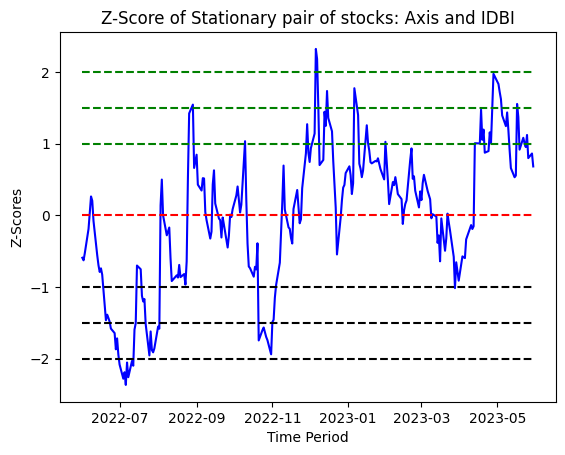

In [ ]:
plt.plot(x_axis,y_axis,color='b',label='Z-Score')
plt.plot(x_axis,z,color='r',linestyle='dashed',label='mean=0')
plt.plot(x_axis,b,color='g',linestyle='dashed',label='mean+2*std=2')
plt.plot(x_axis,c,color='k',linestyle='dashed',label='mean-2*std=-2')
plt.plot(x_axis,d,color='g',linestyle='dashed',label='mean+1.5*std=1.5')
plt.plot(x_axis,e,color='k',linestyle='dashed',label='mean-1.5*std=-1.5')
plt.plot(x_axis,f,color='g',linestyle='dashed',label='mean+1*std=1')
plt.plot(x_axis,g,color='k',linestyle='dashed',label='mean-1*std=-1')
plt.title("Z-Score of Stationary pair of stocks: Axis and IDBI")
#plt.legend()
plt.xlabel("Time Period")
plt.ylabel("Z-Scores")

# Task 3:Returns

Buy and Sell signals at 1.5 standard deviation

In [ ]:
sell_signals = []  # sell axis stocks and buy idbi
buy_signals = []  # sell idbi and buy axis
signals = []

status = ''
for i in final1.index:
    if (final1["Z-Score"][i] > final1['ZSc_mean+1.5Std'][i]) and status != 'SELL':
        sell_signals.append(i)
        signals.append((i,'SELL'))
        status = 'SELL'
    elif (final1["Z-Score"][i] < final1['ZSc_mean-1.5Std'][i]) and status != 'BUY':
        buy_signals.append(i)
        signals.append((i,'BUY'))
        status = 'BUY'
    else:
        signals.append((i, 'NONE'))

print(sell_signals)
print(buy_signals)

[datetime.date(2022, 8, 29), datetime.date(2022, 12, 6)]
[datetime.date(2022, 6, 24), datetime.date(2022, 10, 21)]


Text(0, 0.5, 'Z-Scores')

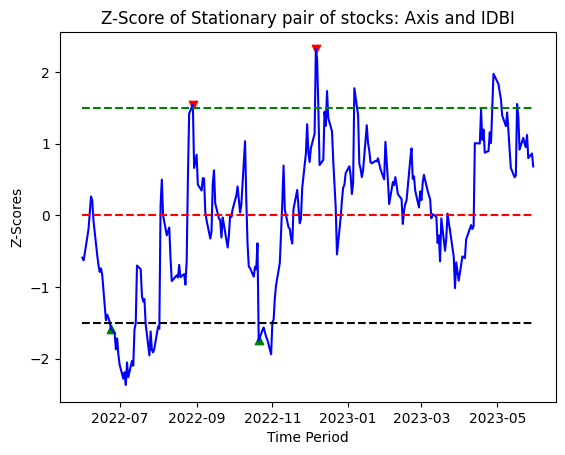

In [ ]:
plt.plot(x_axis,y_axis,color='b',label='Z-Score')
plt.plot(x_axis,z,color='r',linestyle='dashed',label='mean=0')
plt.plot(x_axis,d,color='g',linestyle='dashed',label='mean+1.5*std=1.5')
plt.plot(x_axis,e,color='k',linestyle='dashed',label='mean-1.5*std=-1.5')
plt.title("Z-Score of Stationary pair of stocks: Axis and IDBI")
plt.scatter(sell_signals, final1['Z-Score'][sell_signals], marker='v', color='r')
plt.scatter(buy_signals, final1['Z-Score'][buy_signals], marker='^', color='g')
#plt.legend()
plt.xlabel("Time Period")
plt.ylabel("Z-Scores")

remaining capital = 199.8380012512207
current value = 10164770.48236084
returns = 103.2994064072418%
sells = 6, buys = 5


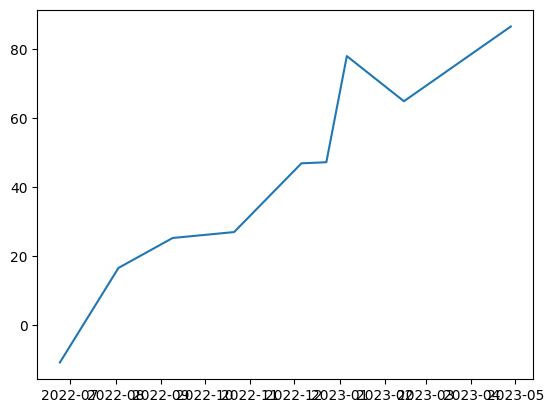

In [ ]:
capital = 50_00_000

n_idbi = (capital // 2) // idbi_data['idbi_Close'][0]
n_axis = (capital // 2) // axisb_data['axisb_Close'][0]

capital -= n_idbi * idbi_data['idbi_Close'][0]
capital -= n_axis * axisb_data['axisb_Close'][0]
index = []
returns = []

sell = 0
buy = 0

for i in range(len(signals)):
    if (signals[i][1] == 'SELL'):  # sell idbi and buy axis
        sell += 1
        capital += n_idbi * idbi_data['idbi_Close'][signals[i][0]]
        n_idbi = 0
        n_axis += capital // axisb_data['axisb_Close'][signals[i][0]]
        capital -= (capital // axisb_data['axisb_Close'][signals[i][0]]) * axisb_data['axisb_Close'][signals[i][0]]
        for x in range((np.where(final1.index==signals[i+1][0])[0][0]-np.where(final1.index==signals[i][0])[0][0])):
          if  ((signals[i][0]+timedelta(days=x) not in final1.index)):
           continue
          elif ((signals[i][0]+timedelta(days=x-1) not in final1.index)):
            continue
          else:
           if((axisb_data['axisb_Close'][signals[i][0]+timedelta(days=x)]-axisb_data['axisb_Close'][signals[i][0]+timedelta(days=x-1)])>0.05*axisb_data['axisb_Close'][signals[i][0]+timedelta(days=x-1)]) or ((idbi_data['idbi_Close'][signals[i][0]+timedelta(days=x-1)]-idbi_data['idbi_Close'][signals[i][0]+timedelta(days=x)])>0.05*idbi_data['idbi_Close'][signals[i][0]+timedelta(days=x-1)]):
            capital += n_idbi * idbi_data['idbi_Close'][signals[i][0]+timedelta(days=x)] - n_axis * axisb_data['axisb_Close'][signals[i][0]+timedelta(days=x)]
            current_value = n_idbi * idbi_data['idbi_Close'][signals[i][0]+timedelta(days=x)] + n_axis * axisb_data['axisb_Close'][signals[i][0]+timedelta(days=x)]
            returns.append((current_value / 50_00_000 - 1) * 100)
            index.append(signals[i][0]+timedelta(days=x))
           else:
            current_value = n_idbi * idbi_data['idbi_Close'][signals[i][0]] + n_axis * axisb_data['axisb_Close'][signals[i][0]]
            returns.append((current_value / 50_00_000 - 1) * 100)
            index.append(signals[i][0])

    elif signals[i][1] == 'BUY':
        buy += 1
        capital += n_axis * axisb_data['axisb_Close'][signals[i][0]]
        n_axis = 0
        n_idbi += capital // idbi_data['idbi_Close'][signals[i][0]]
        capital -= (capital // idbi_data['idbi_Close'][signals[i][0]]) * idbi_data['idbi_Close'][signals[i][0]]
        for x in range((np.where(final1.index==signals[i+1][0])[0][0]-np.where(final1.index==signals[i][0])[0][0])):
          if  ((signals[i][0]+timedelta(days=x) not in final1.index)):
           continue
          elif ((signals[i][0]+timedelta(days=x-1) not in final1.index)):
            continue
          else:
           if((axisb_data['axisb_Close'][signals[i][0]+timedelta(days=x-1)]-axisb_data['axisb_Close'][signals[i][0]+timedelta(days=x)])>0.05*axisb_data['axisb_Close'][signals[i][0]+timedelta(days=x-1)]) or ((idbi_data['idbi_Close'][signals[i][0]+timedelta(days=x)]-idbi_data['idbi_Close'][signals[i][0]+timedelta(days=x-1)])>0.05*idbi_data['idbi_Close'][signals[i][0]+timedelta(days=x-1)]):
            capital += -n_idbi * idbi_data['idbi_Close'][signals[i][0]+timedelta(days=x)] + n_axis * axisb_data['axisb_Close'][signals[i][0]+timedelta(days=x)]
            current_value = n_idbi * idbi_data['idbi_Close'][signals[i][0]+timedelta(days=x)] + n_axis * axisb_data['axisb_Close'][signals[i][0]+timedelta(days=x)]
            returns.append((current_value / 50_00_000 - 1) * 100)
            index.append(signals[i][0]+timedelta(days=x))
           else:
            current_value = n_idbi * idbi_data['idbi_Close'][signals[i][0]] + n_axis * axisb_data['axisb_Close'][signals[i][0]]
            returns.append((current_value / 50_00_000 - 1) * 100)
            index.append(signals[i][0])

    #current_value = n_idbi * idbi_data['idbi_Close'][signals[i][0]] + n_axis * axisb_data['axisb_Close'][signals[i][0]]
    #returns.append((current_value / 50_00_000 - 1) * 100)
    #index.append(signals[i][0])

current_value = n_idbi * idbi_data['idbi_Close'][-1] + n_axis * axisb_data['axisb_Close'][-1]
print(f"remaining capital = {capital}")
print(f"current value = {current_value}")
print(f"returns = {((current_value + capital) / 50_00_000 - 1) * 100}%")
print(f"sells = {sell}, buys = {buy}")

plt.plot(index, returns)

remaining capital = 636.3955688476562
current value = 10808497.586303711
returns = 116.18267963745117%


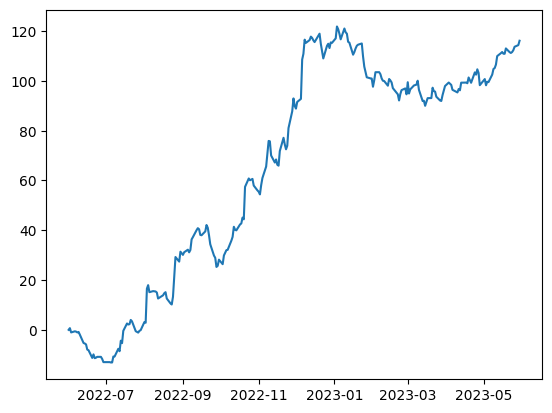

In [ ]:
capital = 50_00_000

n_idbi = (capital // 2) // idbi_data['idbi_Close'][0]
n_axis = (capital // 2) // axisb_data['axisb_Close'][0]

capital -= n_idbi * idbi_data['idbi_Close'][0]
capital -= n_axis * axisb_data['axisb_Close'][0]
index = []
returns = []

for i in signals:
    if (i[1] == 'SELL'):  # sell idbi and buy axis
        capital += n_idbi * idbi_data['idbi_Close'][i[0]]
        n_idbi = 0
        n_axis += capital // axisb_data['axisb_Close'][i[0]]
        capital -= (capital // axisb_data['axisb_Close'][i[0]]) * axisb_data['axisb_Close'][i[0]]
    elif i[1] == 'BUY':
        capital += n_axis * axisb_data['axisb_Close'][i[0]]
        n_axis = 0
        n_idbi += capital // idbi_data['idbi_Close'][i[0]]
        capital -= (capital // idbi_data['idbi_Close'][i[0]]) * idbi_data['idbi_Close'][i[0]]

    portfolio_value = n_idbi * idbi_data['idbi_Close'][i[0]] + n_axis * axisb_data['axisb_Close'][i[0]]

    returns.append((portfolio_value / 50_00_000 - 1) * 100)
    index.append(i[0])

current_value = n_idbi * idbi_data['idbi_Close'][-1] + n_axis * axisb_data['axisb_Close'][-1]+capital
print(f"remaining capital = {capital}")
print(f"current value = {current_value}")
print(f"returns = {((current_value + capital) / 50_00_000 - 1) * 100}%")

plt.plot(index, returns)

 **Buy and sell signals at 1 standard deviation**

In [ ]:
sell_signals = []  # sell axis stocks and buy idbi
buy_signals = []  # sell idbi and buy axis
signals = []

status = ''
for i in final1.index:
    if (final1["Z-Score"][i] > final1['ZSc_mean+1Std'][i]) and status != 'SELL':
        sell_signals.append(i)
        signals.append((i,'SELL'))
        status = 'SELL'
    elif (final1["Z-Score"][i] < final1['ZSc_mean-1Std'][i]) and status != 'BUY':
        buy_signals.append(i)
        signals.append((i,'BUY'))
        status = 'BUY'
    else:
        signals.append((i, 'NONE'))

print(sell_signals)
print(buy_signals)

[datetime.date(2022, 8, 26), datetime.date(2022, 11, 29), datetime.date(2023, 4, 13)]
[datetime.date(2022, 6, 20), datetime.date(2022, 10, 21), datetime.date(2023, 3, 28)]


Text(0, 0.5, 'Z-Scores')

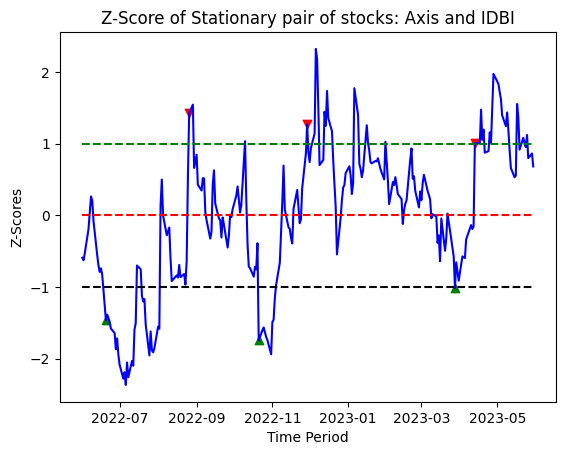

In [ ]:
plt.plot(x_axis,y_axis,color='b',label='Z-Score')
plt.plot(x_axis,z,color='r',linestyle='dashed',label='mean=0')
plt.plot(x_axis,f,color='g',linestyle='dashed',label='mean+1*std=1')
plt.plot(x_axis,g,color='k',linestyle='dashed',label='mean-1*std=-1')
plt.title("Z-Score of Stationary pair of stocks: Axis and IDBI")
plt.scatter(sell_signals, final1['Z-Score'][sell_signals], marker='v', color='r')
plt.scatter(buy_signals, final1['Z-Score'][buy_signals], marker='^', color='g')
#plt.legend()
plt.xlabel("Time Period")
plt.ylabel("Z-Scores")

remaining capital = 302.34647369384766
current value = 11510011.24987793
returns = 130.2062719270325%


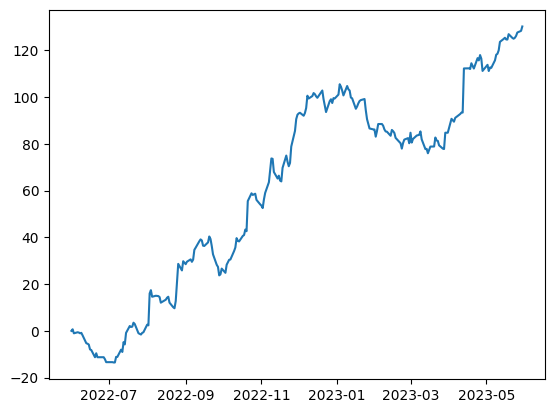

In [ ]:
capital = 50_00_000

n_idbi = (capital // 2) // idbi_data['idbi_Close'][0]
n_axis = (capital // 2) // axisb_data['axisb_Close'][0]

capital -= n_idbi * idbi_data['idbi_Close'][0]
capital -= n_axis * axisb_data['axisb_Close'][0]

index = []
returns = []

for i in signals:
    if (i[1] == 'SELL'):  # sell idbi and buy axis
        capital += n_idbi * idbi_data['idbi_Close'][i[0]]
        n_idbi = 0
        n_axis += capital // axisb_data['axisb_Close'][i[0]]
        capital -= (capital // axisb_data['axisb_Close'][i[0]]) * axisb_data['axisb_Close'][i[0]]
    elif (i[1] == 'BUY'):
        capital += n_axis * axisb_data['axisb_Close'][i[0]]
        n_axis = 0
        n_idbi += capital // idbi_data['idbi_Close'][i[0]]
        capital -= (capital // idbi_data['idbi_Close'][i[0]]) * idbi_data['idbi_Close'][i[0]]

    current_value = n_idbi * idbi_data['idbi_Close'][i[0]] + n_axis * axisb_data['axisb_Close'][i[0]]

    returns.append((current_value / 50_00_000 - 1) * 100)
    index.append(i[0])

current_value = n_idbi * idbi_data['idbi_Close'][-1] + n_axis * axisb_data['axisb_Close'][-1]
print(f"remaining capital = {capital}")
print(f"current value = {current_value}")
print(f"returns = {((current_value + capital) / 50_00_000 - 1) * 100}%")
plt.plot(index, returns)

**Buy and sell signals at 2 standard deviation**

In [ ]:
sell_signals = []  # sell axis stocks and buy idbi
buy_signals = []  # sell idbi and buy axis
signals = []

status = ''
for i in final1.index:
    if (final1["Z-Score"][i] > final1['ZSc_mean+2Std'][i]) and status != 'SELL':
        sell_signals.append(i)
        signals.append((i,'SELL'))
        status = 'SELL'
    elif (final1["Z-Score"][i] < final1['ZSc_mean-2Std'][i]) and status != 'BUY':
        buy_signals.append(i)
        signals.append((i,'BUY'))
        status = 'BUY'
    else:
        signals.append((i, "NONE"))


print(sell_signals)
print(buy_signals)

[datetime.date(2022, 12, 6)]
[datetime.date(2022, 7, 1)]


Text(0, 0.5, 'Z-Scores')

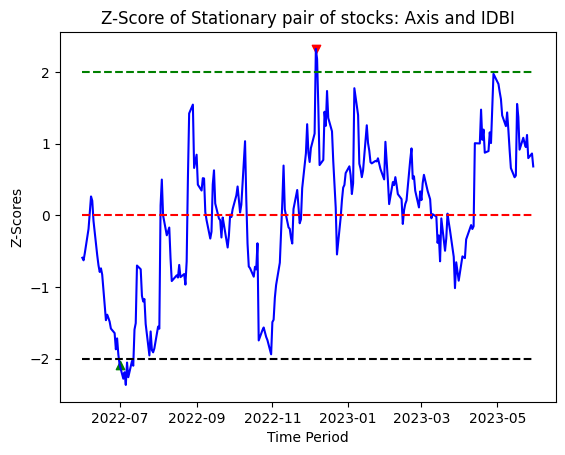

In [ ]:
plt.plot(x_axis,y_axis,color='b',label='Z-Score')
plt.plot(x_axis,z,color='r',linestyle='dashed',label='mean=0')
plt.plot(x_axis,b,color='g',linestyle='dashed',label='mean+2*std=2')
plt.plot(x_axis,c,color='k',linestyle='dashed',label='mean-2*std=-2')
plt.title("Z-Score of Stationary pair of stocks: Axis and IDBI")
plt.scatter(sell_signals, final1['Z-Score'][sell_signals], marker='v', color='r')
plt.scatter(buy_signals, final1['Z-Score'][buy_signals], marker='^', color='g')
#plt.legend()
plt.xlabel("Time Period")
plt.ylabel("Z-Scores")

remaining capital = 638.5592308044434
current value = 8771719.764221191
returns = 75.44716646903993%


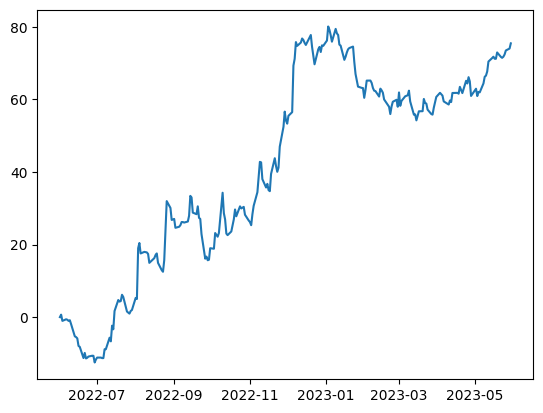

In [ ]:
capital = 50_00_000

n_idbi = (capital // 2) // idbi_data['idbi_Close'][0]
n_axis = (capital // 2) // axisb_data['axisb_Close'][0]

capital -= n_idbi * idbi_data['idbi_Close'][0]
capital -= n_axis * axisb_data['axisb_Close'][0]

index = []
returns = []

for i in signals:
    if (i[1] == 'SELL'):  # sell idbi and buy axis
        capital += n_idbi * idbi_data['idbi_Close'][i[0]]
        n_idbi = 0
        n_axis += capital // axisb_data['axisb_Close'][i[0]]
        capital -= (capital // axisb_data['axisb_Close'][i[0]]) * axisb_data['axisb_Close'][i[0]]
    elif i[1] == 'BUY':
        capital += n_axis * axisb_data['axisb_Close'][i[0]]
        n_axis = 0
        n_idbi += capital // idbi_data['idbi_Close'][i[0]]
        capital -= (capital // idbi_data['idbi_Close'][i[0]]) * idbi_data['idbi_Close'][i[0]]

    current_value = n_idbi * idbi_data['idbi_Close'][i[0]] + n_axis * axisb_data['axisb_Close'][i[0]]

    returns.append((current_value / 50_00_000 - 1) * 100)
    index.append(i[0])

current_value = n_idbi * idbi_data['idbi_Close'][-1] + n_axis * axisb_data['axisb_Close'][-1]
print(f"remaining capital = {capital}")
print(f"current value = {current_value}")
print(f"returns = {((current_value + capital) / 50_00_000 - 1) * 100}%")
plt.plot(index, returns)

In [ ]:
sell_signals = []  # sell axis stocks and buy idbi
buy_signals = []  # sell idbi and buy axis
signals = []

status = ''
for i in final1.index:
    if (final1["Z-Score"][i] > final1['ZSc_mean+1.5Std'][i]) and status != 'SELL':
        sell_signals.append(i)
        signals.append((i,'SELL'))
        status = 'SELL'
    elif (final1["Z-Score"][i] < final1['ZSc_mean'][i]) and status == 'SELL':
        buy_signals.append(i)
        signals.append((i, 'BUY'))
        status = 'MEAN'
    elif (final1["Z-Score"][i] > final1['ZSc_mean'][i]) and status == 'BUY':
        sell_signals.append(i)
        signals.append((i, 'SELL'))
        status = 'MEAN'
    elif (final1["Z-Score"][i] < final1['ZSc_mean-1.5Std'][i]) and status != 'BUY':
        buy_signals.append(i)
        signals.append((i,'BUY'))
        status = 'BUY'
    else:
        signals.append((i, 'NONE'))

print(sell_signals)
print(buy_signals)

[datetime.date(2022, 8, 3), datetime.date(2022, 8, 29), datetime.date(2022, 11, 9), datetime.date(2022, 12, 6), datetime.date(2023, 1, 6), datetime.date(2023, 4, 28)]
[datetime.date(2022, 6, 24), datetime.date(2022, 9, 9), datetime.date(2022, 10, 21), datetime.date(2022, 12, 23), datetime.date(2023, 2, 14)]


Text(0, 0.5, 'Z-Scores')

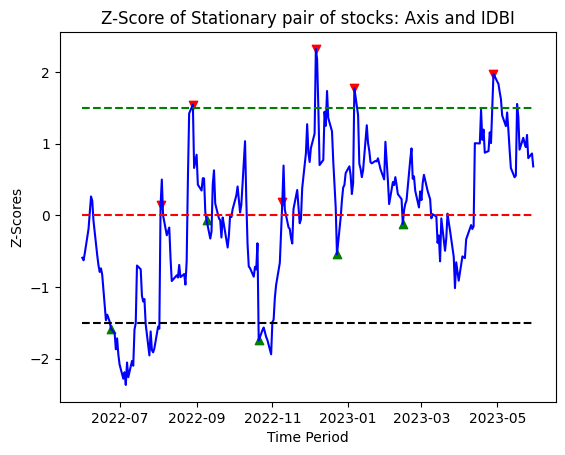

In [ ]:
plt.plot(x_axis,y_axis,color='b',label='Z-Score')
plt.plot(x_axis,z,color='r',linestyle='dashed',label='mean=0')
plt.plot(x_axis,d,color='g',linestyle='dashed',label='mean+1.5*std=1.5')
plt.plot(x_axis,e,color='k',linestyle='dashed',label='mean-1.5*std=-1.5')
plt.title("Z-Score of Stationary pair of stocks: Axis and IDBI")
plt.scatter(sell_signals, final1['Z-Score'][sell_signals], marker='v', color='r')
plt.scatter(buy_signals, final1['Z-Score'][buy_signals], marker='^', color='g')
#plt.legend()
plt.xlabel("Time Period")
plt.ylabel("Z-Scores")

remaining capital = 199.8380012512207
current value = 10164970.320362091
returns = 103.30340316726682%


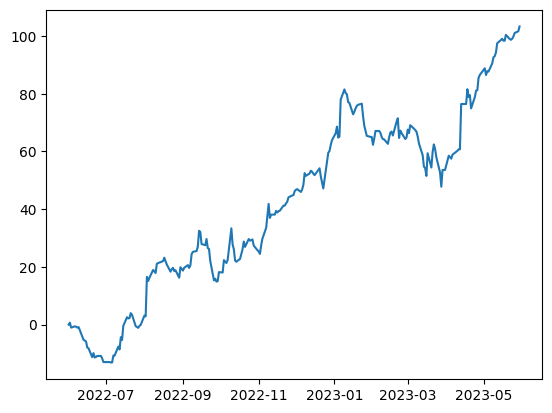

In [ ]:
capital = 50_00_000

n_idbi = (capital // 2) // idbi_data['idbi_Close'][0]
n_axis = (capital // 2) // axisb_data['axisb_Close'][0]

capital -= n_idbi * idbi_data['idbi_Close'][0]
capital -= n_axis * axisb_data['axisb_Close'][0]

index = []
returns = []

for i in signals:
    if (i[1] == 'SELL'):  # sell idbi and buy axis
        capital += n_idbi * idbi_data['idbi_Close'][i[0]]
        n_idbi = 0
        n_axis += capital // axisb_data['axisb_Close'][i[0]]
        capital -= (capital // axisb_data['axisb_Close'][i[0]]) * axisb_data['axisb_Close'][i[0]]
    elif i[1] == 'BUY':
        capital += n_axis * axisb_data['axisb_Close'][i[0]]
        n_axis = 0
        n_idbi += capital // idbi_data['idbi_Close'][i[0]]
        capital -= (capital // idbi_data['idbi_Close'][i[0]]) * idbi_data['idbi_Close'][i[0]]

    current_value = n_idbi * idbi_data['idbi_Close'][i[0]] + n_axis * axisb_data['axisb_Close'][i[0]]

    returns.append((current_value / 50_00_000 - 1) * 100)
    index.append(i[0])

current_value = n_idbi * idbi_data['idbi_Close'][-1] + n_axis * axisb_data['axisb_Close'][-1] + capital
print(f"remaining capital = {capital}")
print(f"current value = {current_value}")
print(f"returns = {((current_value + capital) / 50_00_000 - 1) * 100}%")
plt.plot(index, returns)